In [16]:
import numpy as np
import scipy
import pandas as pd
from scipy import stats

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
n = 100
F_H0 = stats.binom(n, 0.75)

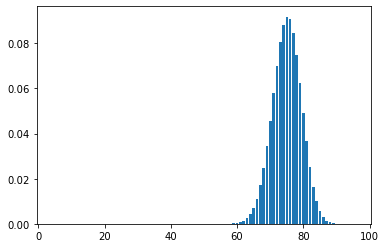

In [12]:
x = np.linspace(0,n,n+1)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(-0.5, n + 0.5) 
pylab.show()

In [15]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided').round(4)

0.0822

In [18]:
pines = pd.read_csv('pines.txt', sep = '\t')

In [23]:
print(pines.shape)

(584, 2)


In [24]:
pines.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [26]:
pines.describe()

,sn,we
count,584.000000,584.000000
mean,98.735274,113.829281
std,56.523154,49.810725
min,0.000000,0.000000
25%,52.050000,79.125000
50%,101.450000,121.900000
75%,149.400000,149.725000
max,200.000000,200.000000


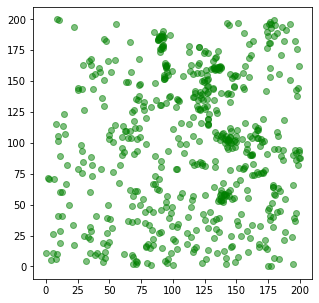

In [46]:
plt.figure(figsize = (5, 5))
plt.scatter(pines.we, pines.sn, c = 'green', alpha = 0.5)

In [52]:
pines_stat = scipy.stats.binned_statistic_2d(pines.we, pines.sn, values = None, statistic = 'count', bins = (5, 5))

In [53]:
pines_stat.statistic

array([[18., 14., 12.,  8.,  7.],
       [26., 12., 24., 19.,  8.],
       [29., 22., 15., 31., 37.],
       [25., 34., 50., 50., 27.],
       [20., 25., 37.,  7., 27.]])

In [56]:
pines_mean = pines_stat.statistic.mean()

print('pines_mean:', pines_mean)

pines_mean: 23.36


In [57]:
stats.chisquare(pines_stat.statistic, pines_mean, axis = None)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [59]:
pines_mean_matrice = np.full((5, 5), pines_mean)
pines_mean_matrice

array([[23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36]])

In [62]:
chi = stats.chisquare(pines_stat.statistic, pines_mean_matrice, axis = None)

In [69]:
print('statistic =', chi.statistic.round(2))
print('p-value =', chi.pvalue)

statistic = 150.59
p-value = 2.574669774967279e-20
